In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from helper_functions import *
from xgboost import XGBClassifier, plot_importance
from models import *
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os
import pickle

In [51]:
# Define the directory where the pickle files are stored
load_directory = 'Sets'

# Load each DataFrame and Series
df_tot = load_from_pickle('df_tot.pkl', load_directory)
y_train_h = load_from_pickle('y_train_h.pkl', load_directory)
y_train_b = load_from_pickle('y_train_b.pkl', load_directory)
y_test_h = load_from_pickle('y_test_h.pkl', load_directory)
y_test_b = load_from_pickle('y_test_b.pkl', load_directory)
X_test = load_from_pickle('X_test.pkl', load_directory)
X_train = load_from_pickle('X_train.pkl', load_directory)
X_train_h = load_from_pickle('X_train_h.pkl', load_directory)
# Optionally, load the dictionary containing the lengths of JIC codes
dict_jic_lengths = load_from_pickle('dict_jic_lengths.pkl', load_directory)

print("All files have been loaded successfully from the folder:", load_directory)


All files have been loaded successfully from the folder: Sets


In [52]:
drop_features = ['jic_code', 'actual_labor_hours', 'scheduled_labor_hours', 'flyhour', 'flycycle', 'type', 'registration']


In [53]:
MAE_list = []

lgbm_model, binary_params = train_lgbm_binary_class_model(X_train, y_train_b)
y_pred = lgbm_model.predict(X_test)
y_pred = pd.Series(y_pred, name='nr_boolean')

hours_model, hours_params = train_lgbm_regress_model(X_train, y_train_h)
y_pred_h = hours_model.predict(X_test)
y_pred_h[y_pred == 0] = 0
y_pred_h[y_pred_h < 0] = 0
mae = mean_absolute_error(y_test_h, y_pred_h)
MAE_list.append(mae)


In [54]:
for feature in drop_features:
    X_train_drop = X_train.copy()
    X_test_drop = X_test.copy()
    X_train_drop = X_train_drop.drop(columns=[feature])
    X_test_drop = X_test_drop.drop(columns=[feature])

    lgbm_model, binary_params = train_lgbm_binary_class_model(X_train_drop, y_train_b)
    y_pred = lgbm_model.predict(X_test_drop)
    y_pred = pd.Series(y_pred, name='nr_boolean')

    hours_model, hours_params = train_lgbm_regress_model(X_train_drop, y_train_h)
    y_pred_h = hours_model.predict(X_test_drop)
    y_pred_h[y_pred == 0] = 0
    y_pred_h[y_pred_h < 0] = 0
    mae = mean_absolute_error(y_test_h, y_pred_h)
    MAE_list.append(mae)

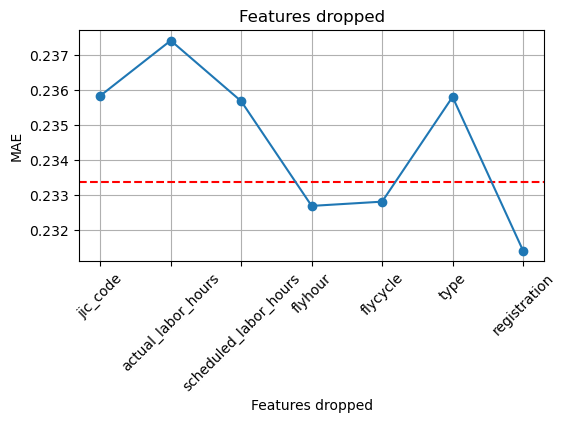

In [64]:
plt.figure(figsize=(6, 3))
plt.axhline(MAE_list[0], color='r', linestyle='--')
plt.plot(drop_features, MAE_list[1:], marker='o')
plt.title('Features dropped')
plt.xlabel('Features dropped')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [65]:
MAE_list = []
for i in range(5, 0, -1):
    X_train_drop = X_train.copy()
    X_test_drop = X_test.copy()
    drop_features = [f'nrtask-{i}', f'nrlabour-{i}']

    X_train_drop = X_train_drop.drop(columns=drop_features)
    X_test_drop = X_test_drop.drop(columns=drop_features)

    lgbm_model, binary_params = train_lgbm_binary_class_model(X_train_drop, y_train_b)
    y_pred = lgbm_model.predict(X_test_drop)
    y_pred = pd.Series(y_pred, name='nr_boolean')

    hours_model, hours_params = train_lgbm_regress_model(X_train_drop, y_train_h)
    y_pred_h = hours_model.predict(X_test_drop)
    y_pred_h[y_pred == 0] = 0
    y_pred_h[y_pred_h < 0] = 0
    mae = mean_absolute_error(y_test_h, y_pred_h)
    MAE_list.append(mae)

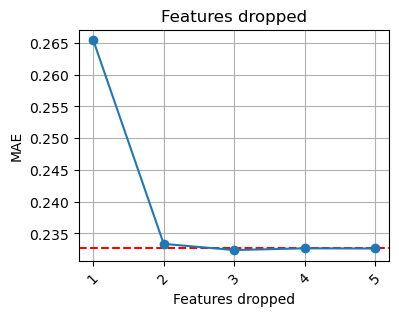

In [67]:
plt.figure(figsize=(4, 3))
plt.axhline(MAE_list[0], color='r', linestyle='--')
plt.plot(range(5, 0, -1), MAE_list, marker='o')
plt.title('Features dropped')
plt.xlabel('Features dropped')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()